In [1]:
from jenga.tasks.shoes import ShoeCategorizationTask
from jenga.corruptions.image import GaussianNoiseCorruption, MotionBlurCorruption, FogCorruption, BrightnessCorruption

from jenga.evaluation.corruption_impact import CorruptionImpactEvaluator

import matplotlib.pyplot as plt

import imgaug.augmenters as iaa

### Instantiate the shoe categorization task and train a baseline model

In [2]:
task = ShoeCategorizationTask(seed=42)

baseline_model = task.fit_baseline_model()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
375/375 [==============================] - 8s 21ms/step - loss: 0.1645 - accuracy: 0.9371


### Train another model on data augmented with gaussian noise corruptions 

In [3]:
import numpy as np

augmented_data = [task.train_data]
augmented_labels= [task.train_labels]

for severity in range(1, 6):
    indexes = np.random.choice(range(0, len(task.train_data)), 2400)
    sample = task.train_data[indexes, :, :].copy()
    corrupted_sample = GaussianNoiseCorruption(fraction=1.0, severity=severity).transform(sample)
    augmented_data.append(corrupted_sample)
    augmented_labels.append(task.train_labels[indexes].copy())

gaussian_noise_model = task.fit_baseline_model(np.concatenate(augmented_data), np.concatenate(augmented_labels))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
750/750 [==============================] - 15s 20ms/step - loss: 0.1758 - accuracy: 0.9317


### Evaluate how well both models can handle corrupted test data

In [4]:
evaluator = CorruptionImpactEvaluator(task)

corruptions  = []
for fraction in [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]:
    corruptions.append(GaussianNoiseCorruption(fraction=fraction, severity=4))
    
gaussian_noise_results = evaluator.evaluate(baseline_model, 10, *corruptions)        
gaussian_noise_results_aug = evaluator.evaluate(gaussian_noise_model, 10, *corruptions)    

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
0/70 (2.4312520000000006)
10/70 (25.508697000000012)
20/70 (48.24758)
30/70 (72.18926200000001)
40/70 (97.60440900000003)
50/70 (123.90635500000002)
60/70 (153.481381)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonl

### Train another model on data augmented with motion blur corruptions 

In [5]:
import numpy as np

augmented_data = [task.train_data]
augmented_labels= [task.train_labels]

for severity in range(1, 6):
    indexes = np.random.choice(range(0, len(task.train_data)), 2400)
    sample = task.train_data[indexes, :, :].copy()
    corrupted_sample = MotionBlurCorruption(fraction=1.0, severity=severity).transform(sample)
    augmented_data.append(corrupted_sample)
    augmented_labels.append(task.train_labels[indexes].copy())

motion_blur_model = task.fit_baseline_model(np.concatenate(augmented_data), np.concatenate(augmented_labels))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
750/750 [==============================] - 14s 19ms/step - loss: 0.1918 - accuracy: 0.9235


### Evaluate how well both models can handle corrupted test data

In [6]:
evaluator = CorruptionImpactEvaluator(task)

corruptions  = []
for fraction in [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]:
    corruptions.append(MotionBlurCorruption(fraction=fraction, severity=4))
    
motion_blur_results = evaluator.evaluate(baseline_model, 10, *corruptions)        
motion_blur_results_aug = evaluator.evaluate(motion_blur_model, 10, *corruptions)    

0/70 (2.341199999999958)
10/70 (25.791493999999943)
20/70 (50.48958399999992)
30/70 (77.47340499999996)
40/70 (110.57398899999998)
50/70 (155.77286800000002)
60/70 (209.93377999999996)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
0/70 (2.2907430000000204)
10/70 (25.817749999999933)
20/70 (50.94627600000001)
30/70 (78.43648799999994)
40/70 (112.28239000000008)
50/70 (155.99658799999997)
60/70 (209.01210100000003)


### Train another model on data augmented with fog corruptions 

In [7]:
import numpy as np

augmented_data = [task.train_data]
augmented_labels= [task.train_labels]

for severity in range(1, 6):
    indexes = np.random.choice(range(0, len(task.train_data)), 2400)
    sample = task.train_data[indexes, :, :].copy()
    corrupted_sample = FogCorruption(fraction=1.0, severity=severity).transform(sample)
    augmented_data.append(corrupted_sample)
    augmented_labels.append(task.train_labels[indexes].copy())

fog_model = task.fit_baseline_model(np.concatenate(augmented_data), np.concatenate(augmented_labels))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
750/750 [==============================] - 16s 21ms/step - loss: 0.2099 - accuracy: 0.9189


### Evaluate how well both models can handle corrupted test data

In [8]:
evaluator = CorruptionImpactEvaluator(task)

corruptions  = []
for fraction in [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]:
    corruptions.append(FogCorruption(fraction=fraction, severity=4))
    
fog_results = evaluator.evaluate(baseline_model, 10, *corruptions)        
fog_results_aug = evaluator.evaluate(fog_model, 10, *corruptions)   

0/70 (2.13116500000001)
10/70 (24.932033000000047)
20/70 (48.70954800000004)
30/70 (74.42075399999999)
40/70 (103.49048599999992)
50/70 (138.22527000000014)
60/70 (179.14466700000003)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
0/70 (2.3602240000000165)
10/70 (26.135790000000043)
20/70 (50.680364000000054)
30/70 (76.93518500000005)
40/70 (106.07760499999995)
50/70 (141.95714199999998)
60/70 (183.23254999999995)


### Plot the results

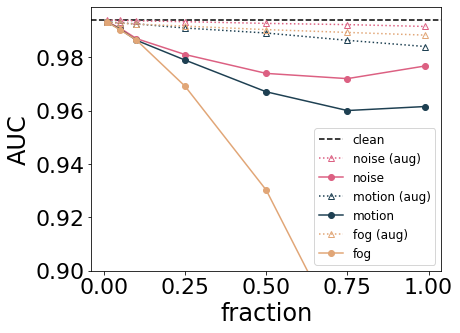

In [9]:
def as_series(results):
    medians = []
    for result in results:
        medians.append(np.median(result.corrupted_scores))
    return medians

ax = plt.gca()        

fractions = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]
markersize=6

l = ax.axhline(gaussian_noise_results[0].baseline_score, linestyle='--', color='black')    

plt.plot(fractions, as_series(gaussian_noise_results_aug), color='#dc6082', linestyle='dotted', marker='^', markersize=markersize, fillstyle='none')
plt.plot(fractions, as_series(gaussian_noise_results), color='#dc6082', marker='o', markersize=markersize)

plt.plot(fractions, as_series(motion_blur_results_aug), color='#1e4052', linestyle='dotted', marker='^', markersize=markersize, fillstyle='none')
plt.plot(fractions, as_series(motion_blur_results), color='#1e4052', marker='o', markersize=markersize)

plt.plot(fractions, as_series(fog_results_aug), color='#e1a677', linestyle='dotted', marker='^', markersize=markersize, fillstyle='none')
plt.plot(fractions, as_series(fog_results), color='#e1a677', marker='o', markersize=markersize)


ax.set_ylim((0.9, 0.999))
ax.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='both', which='minor', labelsize=22)    
ax.set_ylabel('AUC', fontsize=24)
ax.set_xlabel('fraction', fontsize=24)
    
ax.legend(['clean', 'noise (aug)', 'noise', 'motion (aug)', 'motion', 'fog (aug)', 'fog'], fontsize=12)    
    
plt.tight_layout()
plt.gcf().set_size_inches(7, 5)

plt.show()